In [44]:
import pandas as pd
import numpy as np
import os
import re

import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
DIR = '../data'

# Movies

In [46]:
movies = pd.read_csv(os.path.join(DIR, 'movies.csv'))
print(f'Shape: {movies.shape}')

# Year
def identify_year(title):
    pattern = r'\((\d{4})\)$'
    # Search for the pattern in the string
    m = re.search(pattern, title)
    if m:
        return int(m.group(1))
    else:
        return np.nan
    
movies['year'] = movies['title'].apply(identify_year)
# Genres
def flatten(xss):
    return [x for xs in xss for x in xs]

raw_genres = movies['genres'].unique()
genres = set(flatten([item.split('|') for item in raw_genres]))
print('Genres', genres)

for genre in genres:
    movies[f'is_{genre}'] = movies['genres'].apply(lambda x: genre in x)

display(movies.head())

Shape: (9742, 3)
Genres {'Drama', 'Mystery', 'Action', 'Film-Noir', 'IMAX', 'Children', 'Sci-Fi', 'Thriller', 'Horror', 'Crime', '(no genres listed)', 'Western', 'Documentary', 'Comedy', 'Animation', 'Musical', 'Romance', 'Adventure', 'Fantasy', 'War'}


,movieId,title,genres,year,is_Drama,is_Mystery,is_Action,is_Film-Noir,is_IMAX,is_Children,...,is_(no genres listed),is_Western,is_Documentary,is_Comedy,is_Animation,is_Musical,is_Romance,is_Adventure,is_Fantasy,is_War
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,False,False,False,False,False,True,...,False,False,False,True,True,False,False,True,True,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,True,False
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,5,Father of the Bride Part II (1995),Comedy,1995.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


## Year

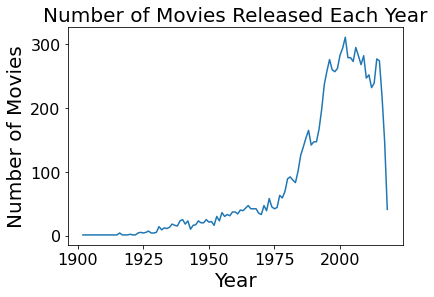

In [47]:
plt.figure(figsize = (6,4))

sns.lineplot(data = movies.groupby('year')['title'].agg('count').reset_index(),
         x='year', y='title')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')
plt.show()

## Genre

In [48]:
img_dir = '../latex/Images/'

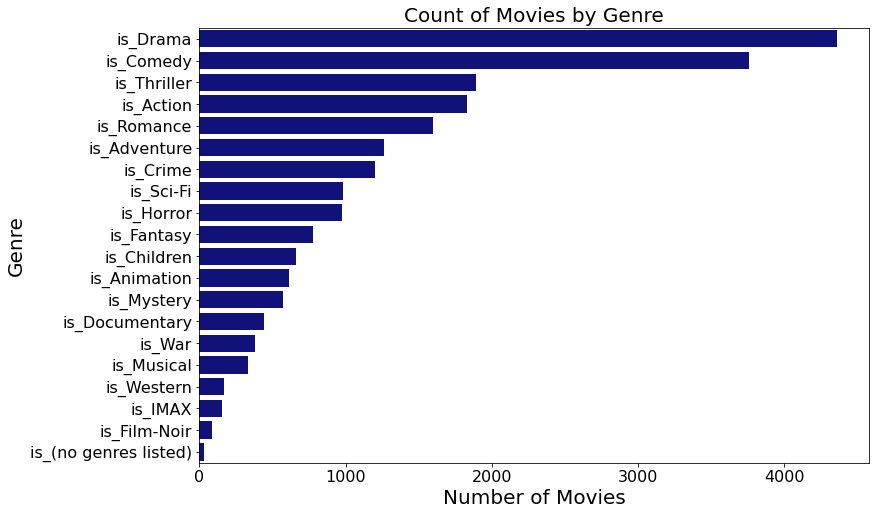

In [49]:
genre_counts = movies.iloc[:, 4:].sum()  # Assuming genre columns start from the 5th column

# Create a DataFrame for plotting
genre_counts_df = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values})

# Plot the count of movies for each genre
plt.figure(figsize=(12, 8))
sns.barplot(data=genre_counts_df, y='Genre', x='Count', color='darkblue',
            order=genre_counts_df.sort_values('Count', ascending=False)['Genre'])
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Count of Movies by Genre')
plt.savefig(os.path.join(img_dir, 'count_genre.png'))
plt.show()

# Ratings

In [50]:
ratings = pd.read_csv(os.path.join(DIR, 'ratings.csv'))
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year_month'] = ratings['timestamp'].dt.to_period('M').dt.to_timestamp()

ratings['date'] = ratings['timestamp'].dt.date
print(f'Shape: {ratings.shape}')

print(f'Number of users: {ratings["userId"].nunique()}')
print(f'Number of movies: {ratings["movieId"].nunique()}')

ratings.head()

Shape: (100836, 6)
Number of users: 610
Number of movies: 9724


,userId,movieId,rating,timestamp,year_month,date
0,1,1,4.0,2000-07-30 18:45:03,2000-07-01,2000-07-30
1,1,3,4.0,2000-07-30 18:20:47,2000-07-01,2000-07-30
2,1,6,4.0,2000-07-30 18:37:04,2000-07-01,2000-07-30
3,1,47,5.0,2000-07-30 19:03:35,2000-07-01,2000-07-30
4,1,50,5.0,2000-07-30 18:48:51,2000-07-01,2000-07-30


## Ratings

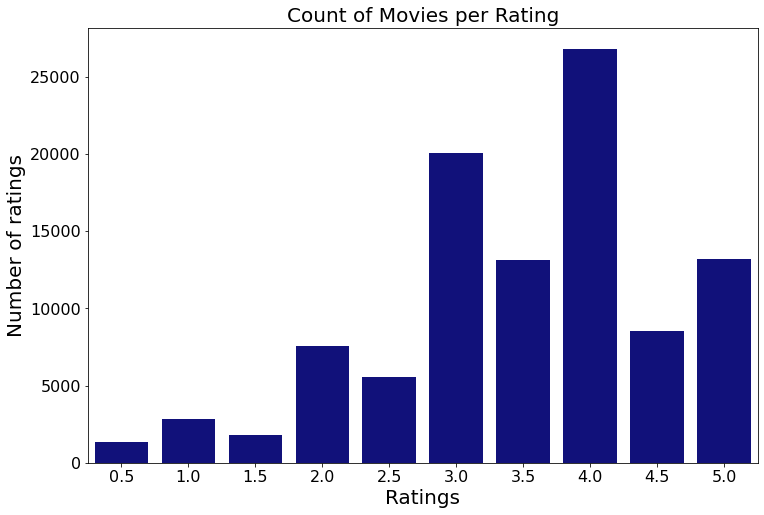

In [51]:
# Plot the count of movies for each genre

plt.rcParams.update({'xtick.labelsize': 16, 'ytick.labelsize': 16, 'axes.labelsize': 20, 'axes.titlesize': 20})

plt.figure(figsize=(12, 8))
sns.countplot(data=ratings, x='rating', color='darkblue')
plt.xlabel('Ratings')
plt.ylabel('Number of ratings')
plt.title('Count of Movies per Rating')

plt.savefig(os.path.join(img_dir, 'count_rating.png'))
plt.show()

##Ratings per movie

In [52]:
movie_ratings = ratings.groupby('movieId').agg({'rating': ['mean', 'count', 'std']})
movie_ratings.columns = ['mean', 'count_', 'std']
movie_ratings = pd.merge(movie_ratings, movies, on='movieId', how='left')[['title', 'movieId', 'mean', 'std', 'count_']]

movie_ratings = movie_ratings.reset_index().query('count_ > 120')
movie_ratings.sort_values('mean', ascending=False).head(5)

,index,title,movieId,mean,std,count_
277,277,"Shawshank Redemption, The (1994)",318,4.429022,0.713019,317
659,659,"Godfather, The (1972)",858,4.289062,0.904344,192
2224,2224,Fight Club (1999),2959,4.272936,0.861384,218
921,921,"Godfather: Part II, The (1974)",1221,4.259690,0.803072,129
913,913,Goodfellas (1990),1213,4.250000,0.683374,126


## Users

/Users/carlosperezricardo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


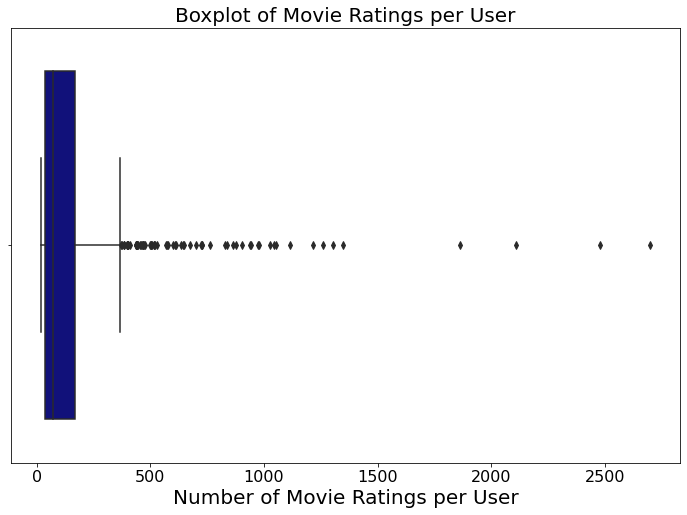

In [53]:
user_movie_counts = ratings.groupby('userId')['movieId'].count()

plt.figure(figsize=(12, 8))
# Create the boxplot
sns.boxplot(user_movie_counts, color='darkblue')

# Set labels and title
plt.xlabel('Number of Movie Ratings per User')
plt.title('Boxplot of Movie Ratings per User')

# Show the plot
plt.savefig(os.path.join(img_dir, 'count_user.png'))
plt.show()

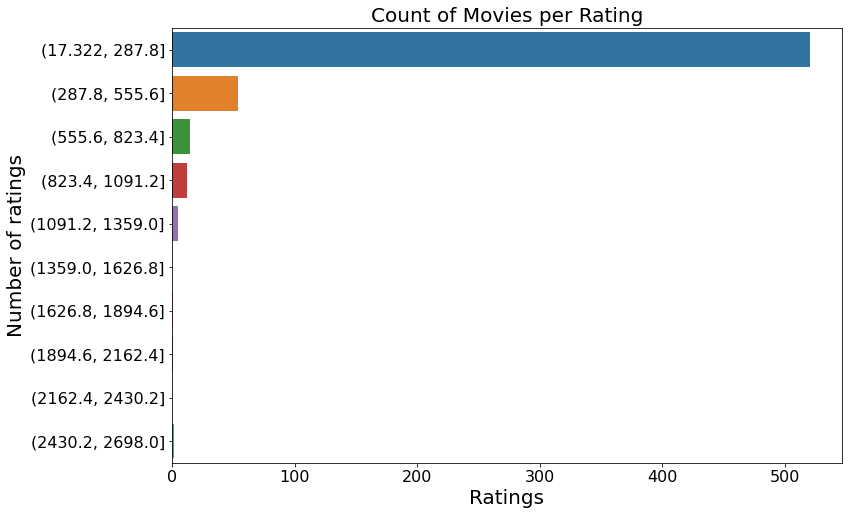

In [54]:
user_counts = ratings.groupby('userId')['movieId'].count().reset_index().rename(columns={'movieId': 'n_ratings'})
# LOG??
user_counts['n_ratings_bin'] = pd.cut( user_counts['n_ratings'], bins=10)

# Plot the count of movies for each genre
plt.figure(figsize=(12, 8))
sns.countplot(data=user_counts, y='n_ratings_bin')
plt.xlabel('Ratings')
plt.ylabel('Number of ratings')
plt.title('Count of Movies per Rating')
plt.show()

In [55]:
print(f'Fewest Rating: {user_counts.n_ratings.min()}')
print(f'Most Rating: {user_counts.n_ratings.max()}')

Fewest Rating: 20
Most Rating: 2698


## Timestamp

In [56]:
ratings['date'].min()
ratings['date'].max()

datetime.date(2018, 9, 24)

In [57]:
ratings['date'] = pd.to_datetime(ratings['date'])
ratings['year_quarter'] = pd.to_datetime(ratings['date'].dt.year.astype(str) + '-Q' + ratings['date'].dt.quarter.astype(str))

<ipython-input-57-9d9cfdebf3e9>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ratings['year_quarter'] = pd.to_datetime(ratings['date'].dt.year.astype(str) + '-Q' + ratings['date'].dt.quarter.astype(str))


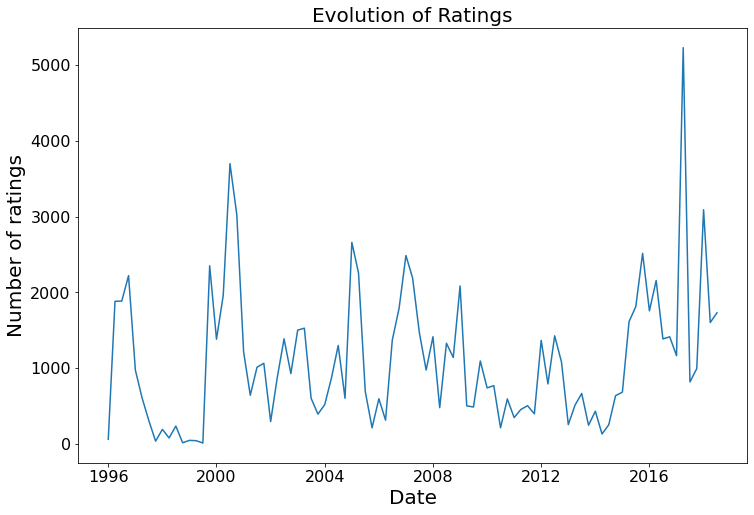

In [166]:
# Plot the count of movies for each genre
plt.figure(figsize=(12, 8))
sns.lineplot(data=ratings.groupby('year_quarter')['userId'].count().reset_index(), x='year_quarter', y='userId')
plt.xlabel('Date')
plt.ylabel('Number of ratings')
plt.title('Evolution of Ratings')

# Show the plot
plt.savefig(os.path.join(img_dir, 'ratings_evolution.png'))
plt.show()

In [163]:
bins = [0, 2, 10, 50, 100]
results = pd.DataFrame()
for year_quarter in sorted(ratings['year_quarter'].unique()):
    #print(year_quarter)
    df_ = ratings.loc[ratings['year_quarter'] <= year_quarter]
    #print(pd.cut(df_.groupby('movieId')['date'].count(), bins=bins).value_counts())
    
    # Add total films 
    add = pd.DataFrame({'date': 'Unique movies', 'count': df_['movieId'].nunique(), 'year_quarter': year_quarter}, index=[0])
    results = pd.concat([results, add], axis='rows')
    
    #
    add = pd.DataFrame(pd.cut(df_.groupby('movieId')['date'].count(), bins=bins, right=True).value_counts()).reset_index()
    #print(add)
    add['year_quarter'] = year_quarter
    results = pd.concat([results, add], axis='rows')

In [164]:
# Rename date
results['n_movies_bin'] = results['date'].astype(str)

results['n_movies_bin'] = (
    results['n_movies_bin']
    .map({str(k): str(k).replace('(', 'From ').replace(',', ' to').replace(']',' ratings') for k in results['n_movies_bin'].unique() })
)
results.head()

,date,count,year_quarter,n_movies_bin
0,Unique movies,58,1996-01-01,Unique movies
0,"(0, 2]",58,1996-01-01,From 0 to 2 ratings
1,"(2, 10]",0,1996-01-01,From 2 to 10 ratings
2,"(10, 50]",0,1996-01-01,From 10 to 50 ratings
3,"(50, 100]",0,1996-01-01,From 50 to 100 ratings


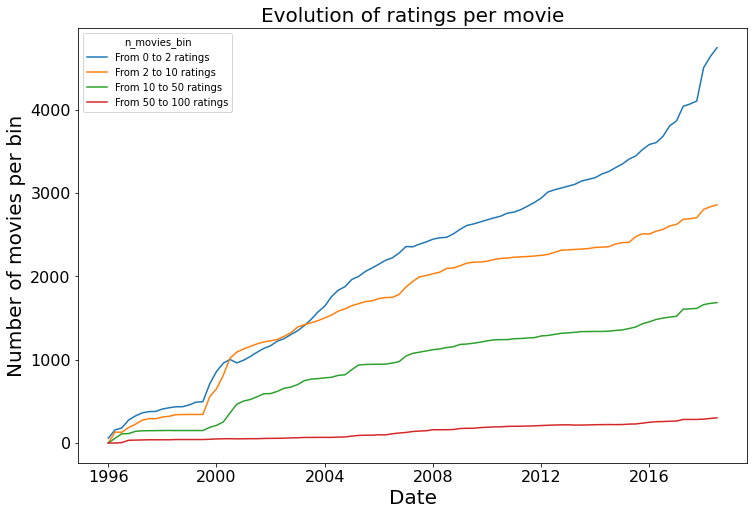

In [165]:
# Plot the count of movies for each genre
plt.figure(figsize=(12, 8))
sns.lineplot(data=results.query('date != "Unique movies"'), x='year_quarter', y='count', hue='n_movies_bin')
plt.xlabel('Date')
plt.ylabel('Number of movies per bin')
plt.title('Evolution of ratings per movie')

# Show the plot
plt.savefig(os.path.join(img_dir, 'ratings_evolution_2.png'))
plt.show()

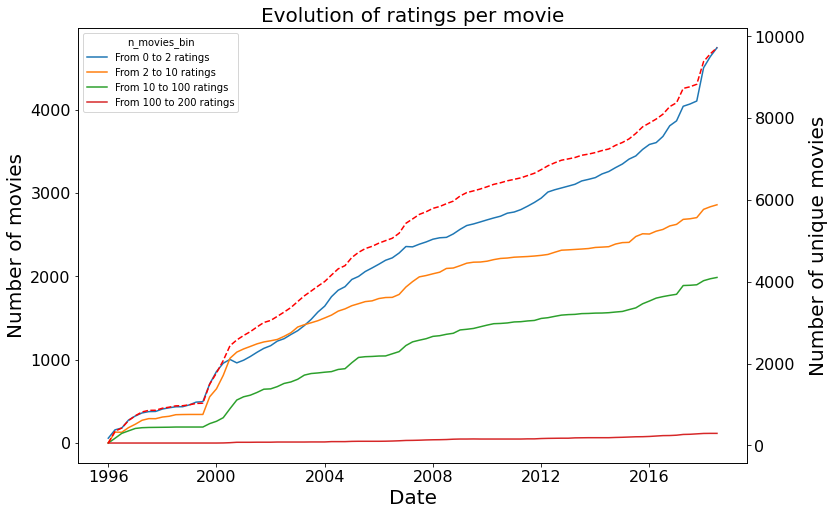

In [161]:
# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the evolution of ratings
sns.lineplot(data=results.query('date != "Unique movies"'), x='year_quarter', y='count', hue='n_movies_bin', ax=ax1, color='b')

# Set the labels and title for the first axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of movies')
ax1.set_title('Evolution of ratings per movie')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the number of movies released each year
sns.lineplot(data=results.query('date == "Unique movies"'), x='year_quarter', y='count', ax=ax2, color='r', linestyle='--')

# Set the labels and title for the second axis
ax2.set_ylabel('Number of unique movies')

# Show the plot
plt.show()

In [ ]:
from prophet import Prophet

ratings['ds'] = pd.to_datetime(ratings['year_month'])  # Convert year_month column to datetime
ratings.rename(columns={'userId': 'y'}, inplace=True)  # Rename column for Prophet

# Initialize Prophet model
model = Prophet()

# Fit the model to your data
model.fit(ratings)

# Define future dates to make predictions for
future_dates = model.make_future_dataframe(periods=12, freq='M')  # Example: Predict for the next 12 months

# Make predictions
forecast = model.predict(future_dates)

19:16:54 - cmdstanpy - INFO - Chain [1] start processing
19:17:16 - cmdstanpy - INFO - Chain [1] done processing


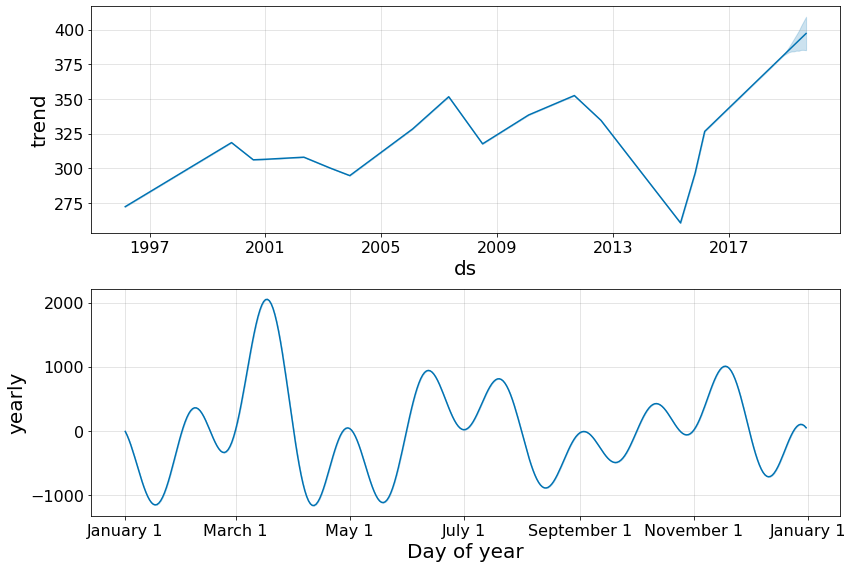

In [ ]:
fig = model.plot_components(forecast, figsize=(12, 8))
fig.savefig(os.path.join(img_dir, 'prophet.png'))

In [ ]:
movies_ = movies.groupby('year')['title'].agg('count').reset_index()
movies_['date'] = pd.to_datetime(movies_['year'].apply(lambda x: str(int(x)) + '-01-01'))
movies_

,year,title,date
0,1902.0,1,1902-01-01
1,1903.0,1,1903-01-01
2,1908.0,1,1908-01-01
3,1915.0,1,1915-01-01
4,1916.0,4,1916-01-01
...,...,...,...
101,2014.0,277,2014-01-01
102,2015.0,274,2015-01-01
103,2016.0,218,2016-01-01
104,2017.0,147,2017-01-01


KeyError: 'Column not found: userId'

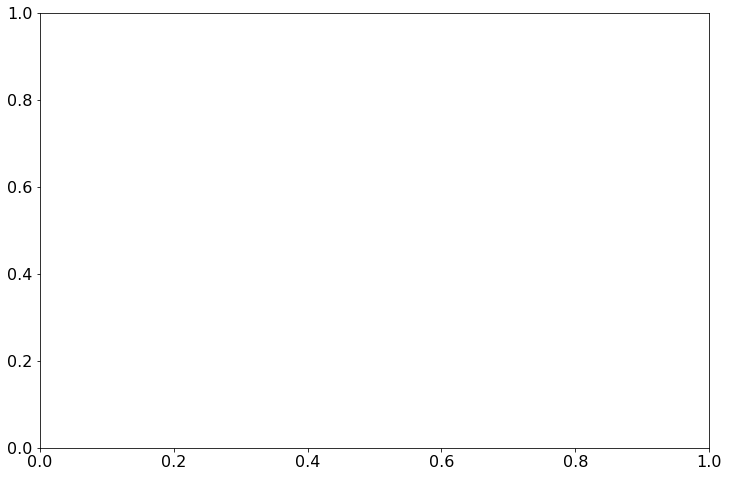

In [ ]:
# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the evolution of ratings
sns.lineplot(data=ratings.groupby('year_month')['userId'].count().reset_index(), x='year_month', y='userId', ax=ax1, color='b')

# Set the labels and title for the first axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Ratings', color='b')
ax1.set_title('Evolution of Ratings')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the number of movies released each year
sns.lineplot(data=movies_, x='date', y='title', ax=ax2, color='r')

# Set the labels and title for the second axis
ax2.set_ylabel('Number of Movies', color='r')

# Show the plot
plt.show()

# Links

In [ ]:
links = pd.read_csv(os.path.join(DIR, 'links.csv'))
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


# Tags

In [ ]:
tags = pd.read_csv(os.path.join(DIR, 'tags.csv'))
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978
